<a href="https://colab.research.google.com/github/ShriAmogh/Deep_Learning/blob/main/drink_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/drink_file

test  train


In [ ]:
!ls /content/drive/MyDrive/drink_file/train

cocacola  pepsi


In [ ]:
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg


In [ ]:
def view_random_image(target_dir, target_class):



  target_folder = target_dir + target_class


  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img

['160.jpg']
Image shape : (270, 230, 3)


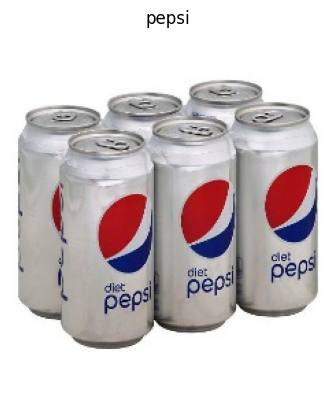

In [ ]:
view_random_image(target_dir = "/content/drive/MyDrive/drink_file/train/", target_class="pepsi");

In [ ]:
#now getting data ready for use

In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

In [ ]:
#now normalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

#now directory
train_dir = "/content/drive/MyDrive/drink_file/train"
test_dir = "/content/drive/MyDrive/drink_file/test"

#now importing data from directories and turning into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, class_mode = "binary",target_size = (224,224))
valid_data = test_datagen.flow_from_directory(directory = test_dir, batch_size = 32, class_mode = "binary",target_size = (224,224))

Found 340 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
#now building neural network

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#now compiling model

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"]
                )

#now fit training data

history_1 = model_1.fit(train_data , epochs = 5, steps_per_epoch= len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
11/11 [==============================] - 139s 12s/step - loss: 0.7668 - accuracy: 0.4765 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
11/11 [==============================] - 1s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
11/11 [==============================] - 1s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
11/11 [==============================] - 1s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
11/11 [==============================] - 1s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 10)                1505290   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1505521 (5.74 MB)
Trainable params: 1505521 (5.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

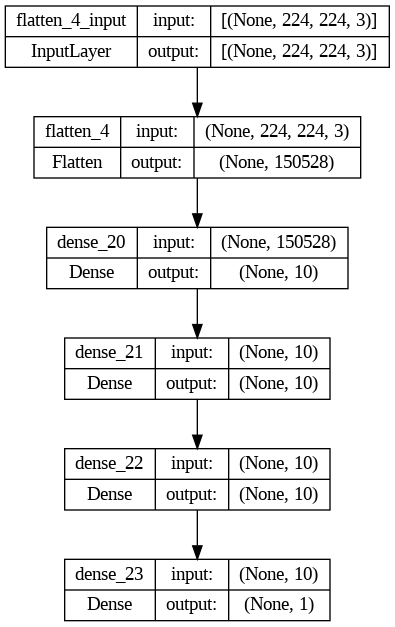

In [ ]:
plot_model(model = model_1, show_shapes = True)

In [ ]:
#now checking accuracy using cnn model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, strides = 1, activation = "relu",
                           padding = "valid", input_shape = (224,224, 3)),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data= valid_data, validation_steps= len(valid_data) )

Epoch 1/5
11/11 [==============================] - 3s 119ms/step - loss: 2.6452 - accuracy: 0.5676 - val_loss: 1.4090 - val_accuracy: 0.5667
Epoch 2/5
11/11 [==============================] - 1s 113ms/step - loss: 0.8679 - accuracy: 0.6971 - val_loss: 0.3614 - val_accuracy: 0.8333
Epoch 3/5
11/11 [==============================] - 1s 120ms/step - loss: 0.3114 - accuracy: 0.8618 - val_loss: 0.2303 - val_accuracy: 0.8833
Epoch 4/5
11/11 [==============================] - 1s 122ms/step - loss: 0.1803 - accuracy: 0.9647 - val_loss: 0.1311 - val_accuracy: 0.9667
Epoch 5/5
11/11 [==============================] - 2s 181ms/step - loss: 0.0964 - accuracy: 0.9794 - val_loss: 0.0794 - val_accuracy: 0.9667


<Axes: >

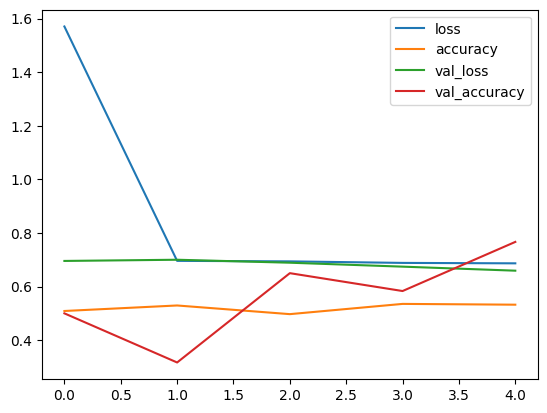

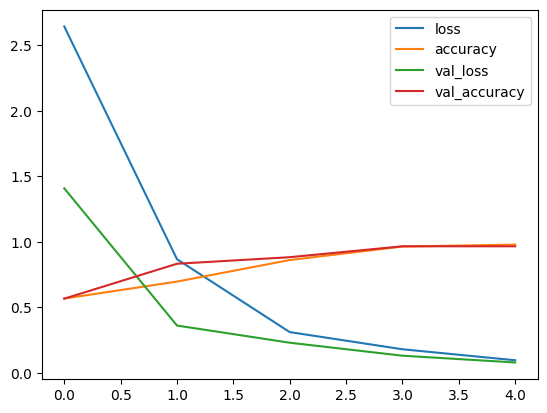

In [ ]:
#now comparing two models with the help of curves
import pandas as pd


pd.DataFrame(history_1.history).plot()


pd.DataFrame(history_2.history).plot()

In [ ]:
# now regularization

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPool2D, Flatten

model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size=3, activation = tf.keras.activations.relu, input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(3),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(3),
    Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch= len(train_data),
                        validation_data = valid_data, validation_steps= len(valid_data))

Epoch 1/5
11/11 [==============================] - 3s 128ms/step - loss: 0.6909 - accuracy: 0.5324 - val_loss: 0.6696 - val_accuracy: 0.7000
Epoch 2/5
11/11 [==============================] - 1s 112ms/step - loss: 0.6457 - accuracy: 0.7206 - val_loss: 0.5849 - val_accuracy: 0.8500
Epoch 3/5
11/11 [==============================] - 1s 120ms/step - loss: 0.5484 - accuracy: 0.7676 - val_loss: 0.4827 - val_accuracy: 0.7833
Epoch 4/5
11/11 [==============================] - 2s 143ms/step - loss: 0.4114 - accuracy: 0.8324 - val_loss: 0.3581 - val_accuracy: 0.8167
Epoch 5/5
11/11 [==============================] - 1s 127ms/step - loss: 0.3205 - accuracy: 0.8529 - val_loss: 0.2275 - val_accuracy: 0.9167
